In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

# Dataframe:

In [2]:
path = r'../../../data/Dados_Satisfacao.xlsx'
df = pd.read_excel(
    io=path
)

In [3]:
display(df.head())

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [4]:
df.columns

Index(['Instituição', 'Comentario', 'Data', 'Classificação',
       'Elogio quanto ao app', 'Reclamação quanto ao app',
       'Elogio a Instituição', 'Reclamação a Instituição',
       'Não Classificável'],
      dtype='object')

# Satisfação Dos Clientes:

## Código:

In [5]:
class Dynamics():
    # Data Understanding: 
    def verificando_as_dimensões_do_dataframe(self, dataframe):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe):
        dataframe = dataframe.describe().round(decimals=2)
        display(dataframe)

    def verificando_valores_nulos(self, dataframe):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
            'Quantidade': valores_nulos,
            'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)

    def verificando_valores_duplicados(self, dataframe):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        display(dataframe)
    
    def verificando_tipos(self, dataframe):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        display(dataframe)

    def verificando_a_distribuição(self, dataframe, coluna):
        sns.histplot(data=dataframe[coluna], kde=True)
        plt.show()
        
    # Data Preparation:
    def normalizando_os_dados(self, dataframe):
        return scale(dataframe)

    def substituindo_valores(self, dataframe, colunas, valores):      
        return dataframe[colunas].replace(valores)
    
    def convertendo_para_inteiro(self, dataframe, colunas):
        return dataframe[colunas].astype(int)

    def agrupando_por_condição(self, dataframe, coluna_1, coluna_2):
        dataframe = dataframe.groupby(coluna_1)[coluna_2].mean().reset_index()
        dataframe[coluna_2] = dataframe[coluna_2]*100
        return dataframe
    
    # Data Visualization:
    def gráfico_de_barras_barplot(self, dataframe, x, y, title):
        plt.subplots(figsize = (10,4))
        sns.barplot(
            data=dataframe, 
            x=x,
            y=y
        )
        ax = plt.gca()
        ax.set_title(title)
    
    def gráfico_de_linhas_lineplot(self, dataframe, x, y, hue, title):
        plt.subplots(figsize = (12,4))
        sns.lineplot(data=dataframe, x=x,  y= y, hue=hue)
        ax = plt.gca()
        ax.set_title(title)
    

if __name__ == '__main__':
    dynamics = Dynamics()

## Output:

### Data Understanding:

In [6]:
display(df.head())

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [7]:
dynamics.verificando_as_dimensões_do_dataframe(dataframe=df)

Linhas: 8702 
Colunas: 9


In [8]:
dynamics.descrição(dataframe=df)

,Classificação
count,8702.00
mean,4.16
std,1.44
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [9]:
dynamics.verificando_valores_nulos(dataframe=df)

,Quantidade,Porcentagem
Instituição,0,0.00%
Comentario,4,0.05%
Data,0,0.00%
Classificação,0,0.00%
Elogio quanto ao app,0,0.00%
Reclamação quanto ao app,0,0.00%
Elogio a Instituição,0,0.00%
Reclamação a Instituição,0,0.00%
Não Classificável,0,0.00%


In [10]:
dynamics.verificando_valores_duplicados(dataframe=df)

,Quantidade,Porcentagem
Instituição,8697,99.94%
Comentario,2825,32.46%
Data,8642,99.31%
Classificação,8697,99.94%
Elogio quanto ao app,8699,99.97%
Reclamação quanto ao app,8700,99.98%
Elogio a Instituição,8700,99.98%
Reclamação a Instituição,8700,99.98%
Não Classificável,8700,99.98%


In [11]:
dynamics.verificando_tipos(dataframe=df)

,Tipos
Instituição,object
Comentario,object
Data,datetime64[ns]
Classificação,int64
Elogio quanto ao app,object
Reclamação quanto ao app,object
Elogio a Instituição,object
Reclamação a Instituição,object
Não Classificável,object


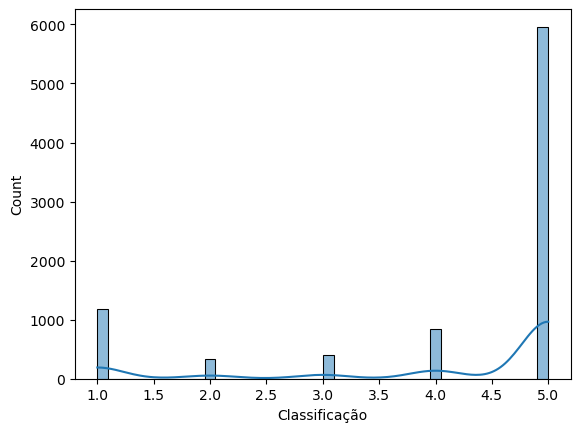

In [12]:
dynamics.verificando_a_distribuição(dataframe=df, coluna='Classificação')

## Data Preparation:

In [13]:
df['Classificação'] = dynamics.normalizando_os_dados(
    dataframe=df['Classificação'] 
)

### Substituindo os valores "Sim" e "Não" por booleanos:

In [14]:
colunas = [
    'Elogio quanto ao app', 
    'Reclamação quanto ao app',
    'Elogio a Instituição', 
    'Reclamação a Instituição',
    'Não Classificável'
]

df[colunas] = dynamics.substituindo_valores(
    dataframe=df,
    colunas=colunas,
    valores={'NAO':'0', 'NÃO':'0', 'SIM':'1'}
)

### Convertendo para inteiro:

In [15]:
df[colunas] = dynamics.convertendo_para_inteiro(
    dataframe=df,
    colunas=colunas,
)

In [16]:
dynamics.verificando_tipos(dataframe=df)

,Tipos
Instituição,object
Comentario,object
Data,datetime64[ns]
Classificação,float64
Elogio quanto ao app,int64
Reclamação quanto ao app,int64
Elogio a Instituição,int64
Reclamação a Instituição,int64
Não Classificável,int64


## Data Visualization:

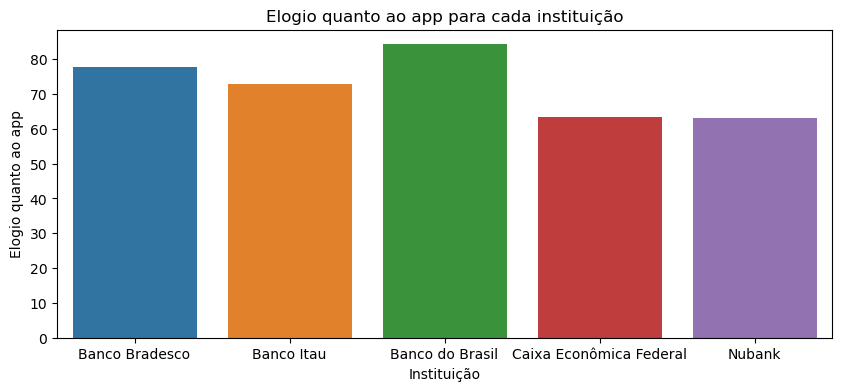

In [17]:
df_elogio_ao_app = dynamics.agrupando_por_condição(
    dataframe=df,
    coluna_1='Instituição',
    coluna_2='Elogio quanto ao app',
)

dynamics.gráfico_de_barras_barplot(
    dataframe=df_elogio_ao_app, 
    x='Instituição', 
    y='Elogio quanto ao app',
    title='Elogio quanto ao app para cada instituição'
)

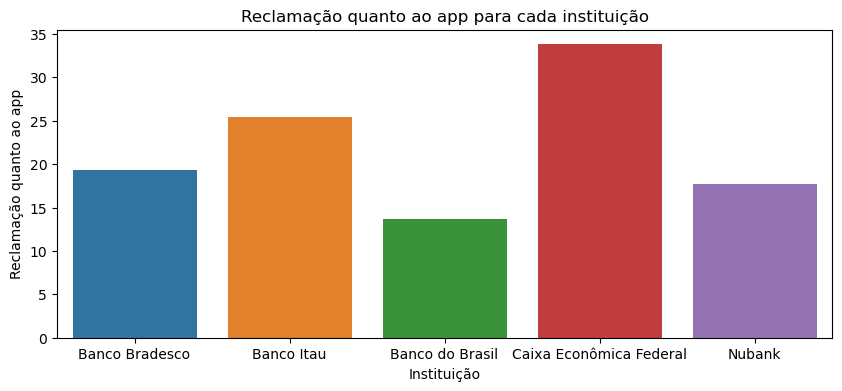

In [18]:
df_reclamações_ao_app = dynamics.agrupando_por_condição(
    dataframe=df,
    coluna_1='Instituição',
    coluna_2='Reclamação quanto ao app',
)

dynamics.gráfico_de_barras_barplot(
    dataframe=df_reclamações_ao_app, 
    x='Instituição', 
    y='Reclamação quanto ao app',
    title='Reclamação quanto ao app para cada instituição'
)

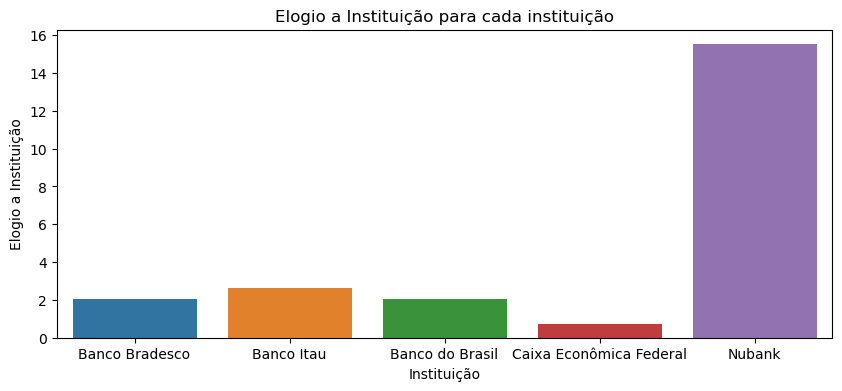

In [19]:
df_elogio_a_instituição = dynamics.agrupando_por_condição(
    dataframe=df,
    coluna_1='Instituição',
    coluna_2='Elogio a Instituição',
)

dynamics.gráfico_de_barras_barplot(
    dataframe=df_elogio_a_instituição, 
    x='Instituição', 
    y='Elogio a Instituição',
    title='Elogio a Instituição para cada instituição'
)

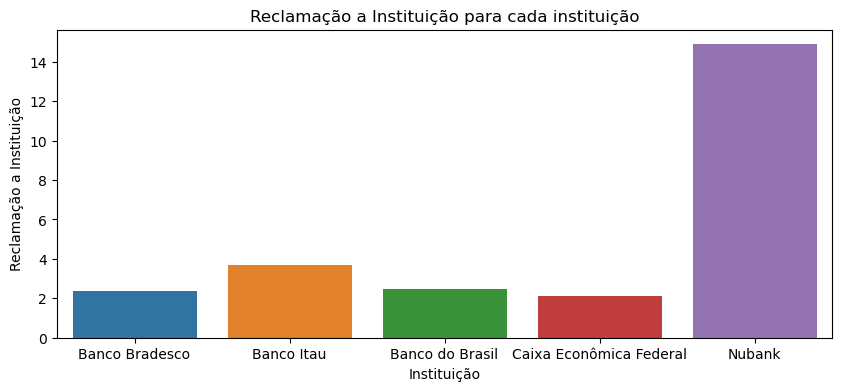

In [20]:
df_reclamação_a_instituição = dynamics.agrupando_por_condição(
    dataframe=df,
    coluna_1='Instituição',
    coluna_2='Reclamação a Instituição',
)

dynamics.gráfico_de_barras_barplot(
    dataframe=df_reclamação_a_instituição, 
    x='Instituição', 
    y='Reclamação a Instituição',
    title='Reclamação a Instituição para cada instituição'
)

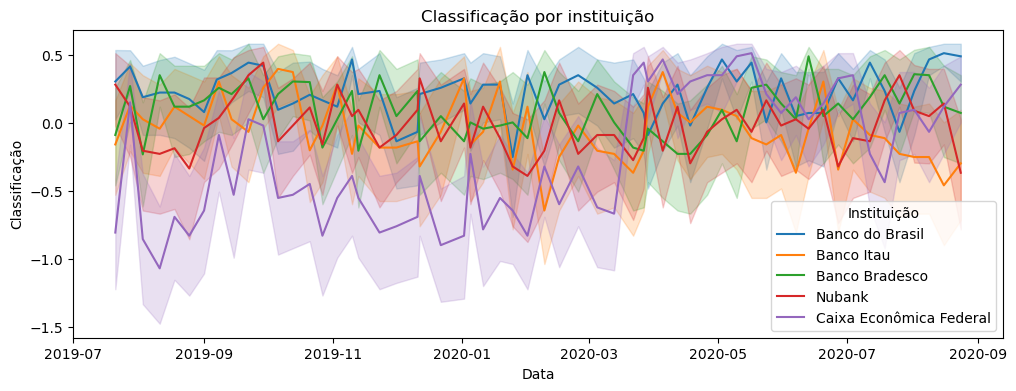

In [21]:
dynamics.gráfico_de_linhas_lineplot(
    dataframe=df, 
    x='Data', 
    y='Classificação', 
    hue='Instituição', 
    title='Classificação por instituição'
)